# Supervised Machine Learning Project - Basic

## **Introduction**

Stress level for remote work can be influenced by many factors such as job role, industry, number of virtual meetings, physical activity, and sleep quality. For this first personal project, I focus on the building the machine learning model to classify the stress level according to all the features in the dataset.

The purpose of the project:

1.   Classify the stress level according to other features such as Mental Health Condition, Age, etc.
2.   Build machine learning model for classification of the stress level



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import pandas as pd

In [ ]:
data = pd.read_csv('/content/Impact_of_Remote_Work_on_Mental_Health.csv')
data.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


## Understand the Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

In [ ]:
data.describe(include=['object', 'int64'])

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
count,5000,5000.000000,5000,5000,5000,5000.000000,5000,5000.000000,5000.000000,5000.000000,5000,3804,5000,5000,5000.000000,5000,5000.000000,3371,5000,5000
unique,5000,NaN,4,7,7,NaN,3,NaN,NaN,NaN,3,3,2,3,NaN,3,NaN,2,3,6
top,EMP0001,NaN,Female,Project Manager,Finance,NaN,Remote,NaN,NaN,NaN,High,Burnout,No,Decrease,NaN,Unsatisfied,NaN,Weekly,Good,Oceania
freq,1,NaN,1274,738,747,NaN,1714,NaN,NaN,NaN,1686,1280,2553,1737,NaN,1677,NaN,1755,1687,867
mean,NaN,40.995000,NaN,NaN,NaN,17.810200,NaN,39.614600,7.559000,2.984200,NaN,NaN,NaN,NaN,2.993800,NaN,3.007800,NaN,NaN,NaN
std,NaN,11.296021,NaN,NaN,NaN,10.020412,NaN,11.860194,4.636121,1.410513,NaN,NaN,NaN,NaN,1.394615,NaN,1.399046,NaN,NaN,NaN
min,NaN,22.000000,NaN,NaN,NaN,1.000000,NaN,20.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,NaN,31.000000,NaN,NaN,NaN,9.000000,NaN,29.000000,4.000000,2.000000,NaN,NaN,NaN,NaN,2.000000,NaN,2.000000,NaN,NaN,NaN
50%,NaN,41.000000,NaN,NaN,NaN,18.000000,NaN,40.000000,8.000000,3.000000,NaN,NaN,NaN,NaN,3.000000,NaN,3.000000,NaN,NaN,NaN
75%,NaN,51.000000,NaN,NaN,NaN,26.000000,NaN,50.000000,12.000000,4.000000,NaN,NaN,NaN,NaN,4.000000,NaN,4.000000,NaN,NaN,NaN


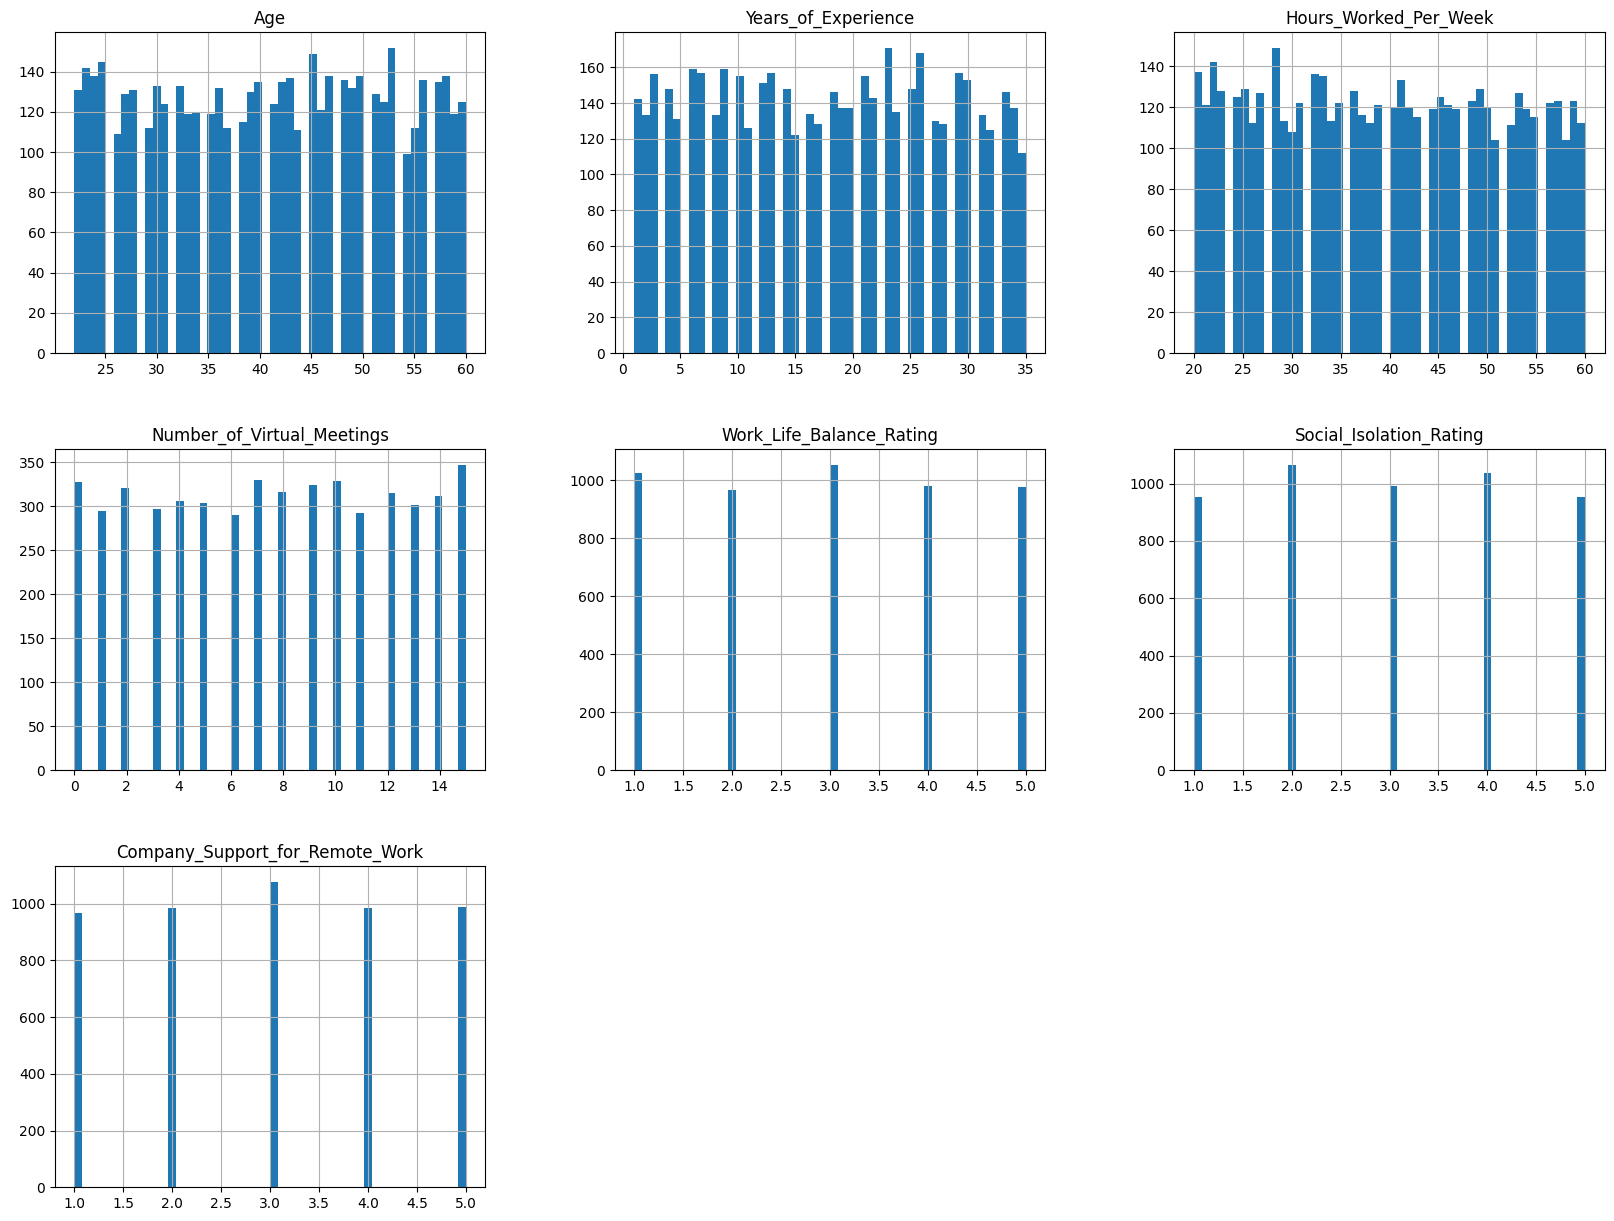

In [ ]:
# visualize the numerical features in the data to understand the distribution

%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

## Spliting the data

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=0)


In [ ]:
data = train_set.copy()
data.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
2913,EMP2914,53,Non-binary,Designer,Education,26,Onsite,25,10,1,Medium,Depression,Yes,No Change,1,Satisfied,2,Daily,Poor,North America
3275,EMP3276,39,Non-binary,Project Manager,IT,11,Remote,43,1,4,Low,Anxiety,Yes,Decrease,4,Unsatisfied,4,Weekly,Average,North America
775,EMP0776,40,Female,Sales,Healthcare,9,Remote,58,10,1,Medium,Depression,Yes,Increase,3,Satisfied,2,Weekly,Average,North America
217,EMP0218,38,Prefer not to say,Data Scientist,Education,35,Onsite,33,4,2,Low,Anxiety,Yes,Increase,2,Neutral,2,Daily,Average,Europe
1245,EMP1246,42,Female,Designer,IT,30,Onsite,52,3,5,High,Depression,Yes,No Change,4,Unsatisfied,1,Daily,Average,North America


In [ ]:
data = train_set.drop(['Stress_Level'], axis=1).copy() # Features
data_labels = train_set['Stress_Level'].copy() # Target variable
print('Shape of X:', {data.shape})
print('Shape of y:', {data_labels.shape})

Shape of X: {(4000, 19)}
Shape of y: {(4000,)}


In [ ]:
print('Shape of train set:', train_set.shape)
print('Shape of test set:', test_set.shape)

Shape of train set: (4000, 20)
Shape of test set: (1000, 20)


In [ ]:
train_set['Stress_Level'].value_counts()

,count
Stress_Level,
High,1352
Medium,1332
Low,1316


In [ ]:
# for reproducibility
np.random.seed(0)

# **Data Cleaning**

## Handling with Empty Cell

In [ ]:
data.isnull().sum()

,0
Employee_ID,0
Age,0
Gender,0
Job_Role,0
Industry,0
Years_of_Experience,0
Work_Location,0
Hours_Worked_Per_Week,0
Number_of_Virtual_Meetings,0
Work_Life_Balance_Rating,0




*   There are no missing values in the numerical features.
*   There are 2 non-numerical features that had missing values.



## Drop some outliers:

In [ ]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators = 100, contamination = 0.03, max_samples ='auto', random_state=0)
outlier_pred = isolation_forest.fit_predict(data.select_dtypes(include=np.number))
outlier_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
print(outlier_pred[:20])
print("Number of outliers detected: {}".format(outlier_pred[outlier_pred < 0].sum()))
print("Number of normal samples detected: {}".format(outlier_pred[outlier_pred > 0].sum()))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Number of outliers detected: -120
Number of normal samples detected: 3880


In [ ]:
data = data.iloc[outlier_pred == 1]
data_labels = data_labels.iloc[outlier_pred == 1]

In [ ]:
data.shape

(3880, 19)

In [ ]:
data_labels.shape

(3880,)

## Handling Text and Categorical Attributes

### Firstly, handling the Mental_Health_Conditions column

In [ ]:
# I choose to fill the missing values with 'Others' because there were a lot of possibilities for Mental Health Condition

data['Mental_Health_Condition'].fillna('Others', inplace=True)

<ipython-input-18-8388486ab648>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Mental_Health_Condition'].fillna('Others', inplace=True)


In [ ]:
# checking if the method is working

data.isnull().sum()

,0
Employee_ID,0
Age,0
Gender,0
Job_Role,0
Industry,0
Years_of_Experience,0
Work_Location,0
Hours_Worked_Per_Week,0
Number_of_Virtual_Meetings,0
Work_Life_Balance_Rating,0


In [ ]:
data['Mental_Health_Condition'].value_counts()

,count
Mental_Health_Condition,
Burnout,995
Anxiety,990
Depression,958
Others,937


### Secondly, handling the missing values for Physical_Activity column

In [ ]:
data['Physical_Activity'].fillna('Monthly', inplace=True)

<ipython-input-21-7805be811a93>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Physical_Activity'].fillna('Monthly', inplace=True)


In [ ]:
data.isnull().sum()

,0
Employee_ID,0
Age,0
Gender,0
Job_Role,0
Industry,0
Years_of_Experience,0
Work_Location,0
Hours_Worked_Per_Week,0
Number_of_Virtual_Meetings,0
Work_Life_Balance_Rating,0


In [ ]:
data['Physical_Activity'].value_counts()

,count
Physical_Activity,
Weekly,1363
Daily,1264
Monthly,1253


## Dropping Unnecessary Column

In [ ]:
data.drop(['Employee_ID', 'Region'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3880 entries, 2913 to 2732
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Age                                3880 non-null   int64 
 1   Gender                             3880 non-null   object
 2   Job_Role                           3880 non-null   object
 3   Industry                           3880 non-null   object
 4   Years_of_Experience                3880 non-null   int64 
 5   Work_Location                      3880 non-null   object
 6   Hours_Worked_Per_Week              3880 non-null   int64 
 7   Number_of_Virtual_Meetings         3880 non-null   int64 
 8   Work_Life_Balance_Rating           3880 non-null   int64 
 9   Mental_Health_Condition            3880 non-null   object
 10  Access_to_Mental_Health_Resources  3880 non-null   object
 11  Productivity_Change                3880 non-null   object
 12  Social_I

In [ ]:
data_cat = data.select_dtypes(include=object)
data_cat.head()

,Gender,Job_Role,Industry,Work_Location,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Satisfaction_with_Remote_Work,Physical_Activity,Sleep_Quality
2913,Non-binary,Designer,Education,Onsite,Depression,Yes,No Change,Satisfied,Daily,Poor
3275,Non-binary,Project Manager,IT,Remote,Anxiety,Yes,Decrease,Unsatisfied,Weekly,Average
775,Female,Sales,Healthcare,Remote,Depression,Yes,Increase,Satisfied,Weekly,Average
217,Prefer not to say,Data Scientist,Education,Onsite,Anxiety,Yes,Increase,Neutral,Daily,Average
1245,Female,Designer,IT,Onsite,Depression,Yes,No Change,Unsatisfied,Daily,Average


## Encoding the categorical features

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# sparse_output=False avoid for creating a lot of column with zeros
cat_encoder = OneHotEncoder(sparse_output=False)
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [ ]:
data_cat_1hot = pd.DataFrame(data_cat_1hot, columns=cat_encoder.get_feature_names_out())
data_cat_1hot.head()

,Gender_Female,Gender_Male,Gender_Non-binary,Gender_Prefer not to say,Job_Role_Data Scientist,Job_Role_Designer,Job_Role_HR,Job_Role_Marketing,Job_Role_Project Manager,Job_Role_Sales,...,Productivity_Change_No Change,Satisfaction_with_Remote_Work_Neutral,Satisfaction_with_Remote_Work_Satisfied,Satisfaction_with_Remote_Work_Unsatisfied,Physical_Activity_Daily,Physical_Activity_Monthly,Physical_Activity_Weekly,Sleep_Quality_Average,Sleep_Quality_Good,Sleep_Quality_Poor
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


## Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler, PowerTransformer

In [ ]:
data_num = data.select_dtypes(include=np.number)

In [ ]:
# MinMaxScaler scale the data between -1 and 1
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
data_num_min_max_scaled = min_max_scaler.fit_transform(data_num)
data_num_min_max_scaled

array([[ 0.63157895,  0.47058824, -0.75      , ..., -1.        ,
        -1.        , -0.5       ],
       [-0.10526316, -0.41176471,  0.15      , ...,  0.5       ,
         0.5       ,  0.5       ],
       [-0.05263158, -0.52941176,  0.9       , ..., -1.        ,
         0.        , -0.5       ],
       ...,
       [-0.84210526,  0.47058824, -0.1       , ...,  1.        ,
         0.        ,  0.        ],
       [-0.42105263,  0.17647059, -0.05      , ..., -0.5       ,
         0.5       , -1.        ],
       [-0.15789474,  0.47058824, -0.65      , ..., -1.        ,
         0.        ,  0.        ]])

In [ ]:
# PowerTransformer
data_num_PT = PowerTransformer().fit_transform(data_num)
data_num_PT

array([[ 1.07609987,  0.85430888, -1.27254794, ..., -1.48169423,
        -1.49960586, -0.70422262],
       [-0.14548583, -0.59833658,  0.31852977, ...,  0.76201003,
         0.75027081,  0.72126749],
       [-0.05546345, -0.82495903,  1.49868148, ..., -1.48169423,
         0.06382808, -0.70422262],
       ...,
       [-1.46549268,  0.85430888, -0.10015156, ...,  1.40247082,
         0.06382808,  0.03240771],
       [-0.69643514,  0.40525933, -0.0152096 , ..., -0.65923328,
         0.75027081, -1.5104467 ],
       [-0.23599621,  0.85430888, -1.08255108, ..., -1.48169423,
         0.06382808,  0.03240771]])

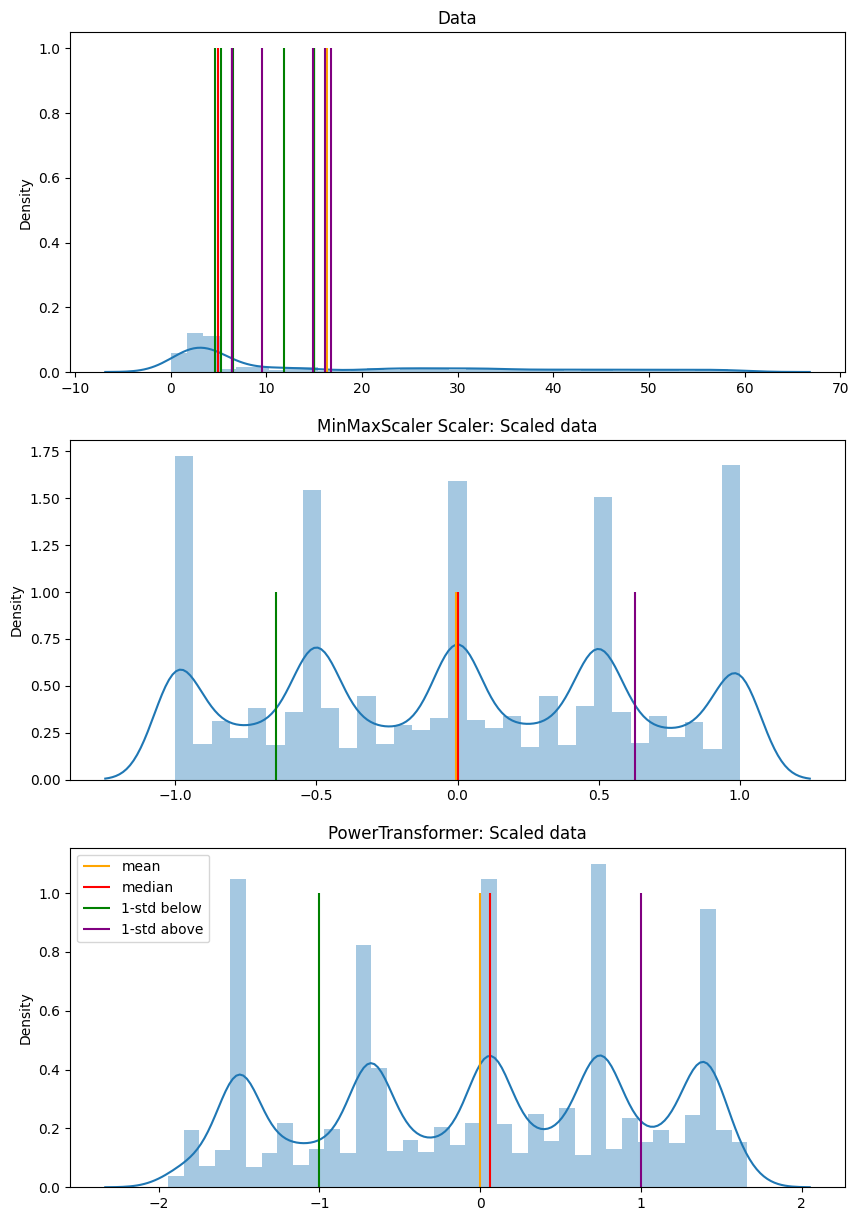

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# plotting the results of scaling

fig, ax=plt.subplots(3,1)
fig.set_size_inches(10, 15)

sns.distplot(data_num, ax=ax[0])
ax[0].set_title('Original Data: Unscaled data')
ax[0].vlines(np.mean(data_num), ymin=0, ymax=1, color='orange', label='mean')
ax[0].vlines(np.median(data_num), ymin=0, ymax=1, color='red', label='median')
ax[0].vlines(np.mean(data_num) - np.std(data_num, ddof=1) , ymin=0, ymax=1, color='green', label='1-std below')
ax[0].vlines(np.median(data_num) + np.std(data_num, ddof=1) , ymin=0, ymax=1, color='purple', label='1-std above')
ax[0].set_title('Data')

sns.distplot(data_num_min_max_scaled, ax=ax[1])
ax[1].set_title('MinMaxScaler Scaler: Scaled data')
ax[1].vlines(np.mean(data_num_min_max_scaled), ymin=0, ymax=1, color='orange', label='mean')
ax[1].vlines(np.median(data_num_min_max_scaled), ymin=0, ymax=1, color='red', label='median')
ax[1].vlines(np.mean(data_num_min_max_scaled) - np.std(data_num_min_max_scaled, ddof=1) , ymin=0, ymax=1, color='green', label='1-std below')
ax[1].vlines(np.mean(data_num_min_max_scaled) + np.std(data_num_min_max_scaled, ddof=1) , ymin=0, ymax=1, color='purple', label='1-std above')


sns.distplot(data_num_PT, ax=ax[2])
ax[2].set_title('PowerTransformer: Scaled data')
ax[2].vlines(np.mean(data_num_PT), ymin=0, ymax=1, color='orange', label='mean')
ax[2].vlines(np.median(data_num_PT), ymin=0, ymax=1, color='red', label='median')
ax[2].vlines(np.mean(data_num_PT) - np.std(data_num_PT, ddof=1) , ymin=0, ymax=1, color='green', label='1-std below')
ax[2].vlines(np.mean(data_num_PT) + np.std(data_num_PT, ddof=1) , ymin=0, ymax=1, color='purple', label='1-std above')

plt.legend()
plt.show()

## Custom Transformer

1. Preprocessing custom transformer

In [ ]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import numpy as np


class CustomImputer(BaseEstimator, TransformerMixin):
    def __init__(self, cat_columns, impute_values, column_to_drop):
        self.cat_columns = cat_columns
        self.impute_values = impute_values
        self.column_to_drop = column_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Impute specified values for the specified columns
        for col, val in zip(self.cat_columns, self.impute_values):
            X[col] = X[col].fillna(val)

        # Drop specified columns
        X = X.drop(columns=self.column_to_drop, errors='ignore')  # errors='ignore' to avoid error if column doesn't exist

        return X

class PreprocessingTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, num_attribs, cat_attribs, custom_imputer_cols, column_to_drop):
        self.num_attribs = num_attribs
        self.cat_attribs = cat_attribs
        self.custom_imputer_cols = custom_imputer_cols
        self.column_to_drop = column_to_drop

    def fit(self, X, y=None):
        # Fit numerical pipeline
        self.num_pipeline_ = Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', MinMaxScaler()),
        ])
        self.num_pipeline_.fit(X[self.num_attribs])

        # Fit categorical pipeline
        self.cat_pipeline_ = Pipeline([
            ('custom_imputer', CustomImputer(cat_columns=self.custom_imputer_cols,
                                           impute_values=['Others', 'Monthly'],
                                           column_to_drop=self.column_to_drop)),
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
        ])
        self.cat_pipeline_.fit(X[self.cat_attribs])

        return self

    def transform(self, X, y=None):
        # Transform numerical features
        X_num = self.num_pipeline_.transform(X[self.num_attribs])

        # Transform categorical features
        X_cat = self.cat_pipeline_.transform(X[self.cat_attribs])

        # Concatenate transformed features
        X_transformed = np.concatenate([X_num, X_cat], axis=1)

        return X_transformed

    def get_feature_names_out(self, input_features=None):
        # Get numerical feature names
        num_feature_names = self.num_pipeline_.get_feature_names_out(self.num_attribs)

        # Get categorical feature names
        cat_feature_names = self.cat_pipeline_.named_steps['encoder'].get_feature_names_out(self.cat_attribs)

        # Combine all feature names
        all_feature_names = list(num_feature_names) + list(cat_feature_names)

        return all_feature_names

In [ ]:
num_attribs = ['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week',
                    'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
                    'Social_Isolation_Rating', 'Company_Support_for_Remote_Work']
cat_attribs = ['Gender', 'Job_Role', 'Industry', 'Work_Location',
                    'Mental_Health_Condition', 'Access_to_Mental_Health_Resources',
                    'Productivity_Change', 'Satisfaction_with_Remote_Work',
                    'Physical_Activity', 'Sleep_Quality']
custom_imputer_cols = ['Mental_Health_Condition', 'Physical_Activity']
column_to_drop = ['Employee_ID', 'Region']

In [ ]:
# create the transformer
preprocessor = PreprocessingTransformer(num_attribs, cat_attribs, custom_imputer_cols, column_to_drop)

In [ ]:
# fit and transform the data
data_prepared = preprocessor.fit_transform(data)

In [ ]:
# get feature names
feature_names = preprocessor.get_feature_names_out()

In [ ]:
data_prepared_df = pd.DataFrame(data_prepared, columns=feature_names)

In [ ]:
data_prepared_df

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work,Gender_Female,Gender_Male,Gender_Non-binary,...,Productivity_Change_No Change,Satisfaction_with_Remote_Work_Neutral,Satisfaction_with_Remote_Work_Satisfied,Satisfaction_with_Remote_Work_Unsatisfied,Physical_Activity_Daily,Physical_Activity_Monthly,Physical_Activity_Weekly,Sleep_Quality_Average,Sleep_Quality_Good,Sleep_Quality_Poor
0,0.815789,0.735294,0.125,0.666667,0.00,0.00,0.25,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.447368,0.294118,0.575,0.066667,0.75,0.75,0.75,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.473684,0.235294,0.950,0.666667,0.00,0.50,0.25,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.421053,1.000000,0.325,0.266667,0.25,0.25,0.25,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.526316,0.852941,0.800,0.200000,1.00,0.75,0.00,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3875,0.026316,0.500000,0.175,0.466667,0.75,0.50,0.50,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3876,0.684211,0.647059,0.850,0.600000,0.50,0.25,0.00,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3877,0.078947,0.735294,0.450,0.533333,1.00,0.50,0.50,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3878,0.289474,0.588235,0.475,0.733333,0.25,0.75,0.00,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## Finding the best classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
model_1 = RandomForestClassifier()
model_2 = SVC()
model_3 = LogisticRegression()
model_4 = KNeighborsClassifier()
model_5 = GaussianNB()

# print('******************************')
print('Random Forest Classifier')
model_1.fit(data_prepared_df, data_labels)
model_1.score(data_prepared_df, data_labels)
print(model_1.score(data_prepared_df, data_labels))

print('******************************')
print('Support Vector Classifier')
model_2.fit(data_prepared_df, data_labels)
model_2.score(data_prepared_df, data_labels)
print(model_2.score(data_prepared_df, data_labels))

print('******************************')
print('Logistic Regression')
model_3.fit(data_prepared_df, data_labels)
model_3.score(data_prepared_df, data_labels)
print(model_3.score(data_prepared_df, data_labels))

print('******************************')
print('K Neighbors Classifier')
model_4.fit(data_prepared_df, data_labels)
model_4.score(data_prepared_df, data_labels)
print(model_4.score(data_prepared_df, data_labels))

print('******************************')
print('Naive Bayes Classifier')
model_5.fit(data_prepared_df, data_labels)
model_5.score(data_prepared_df, data_labels)
print(model_5.score(data_prepared_df, data_labels))

Random Forest Classifier
1.0
******************************
Support Vector Classifier
0.6752577319587629
******************************
Logistic Regression
0.3832474226804124
******************************
K Neighbors Classifier
0.5572164948453608
******************************
Naive Bayes Classifier
0.37912371134020617


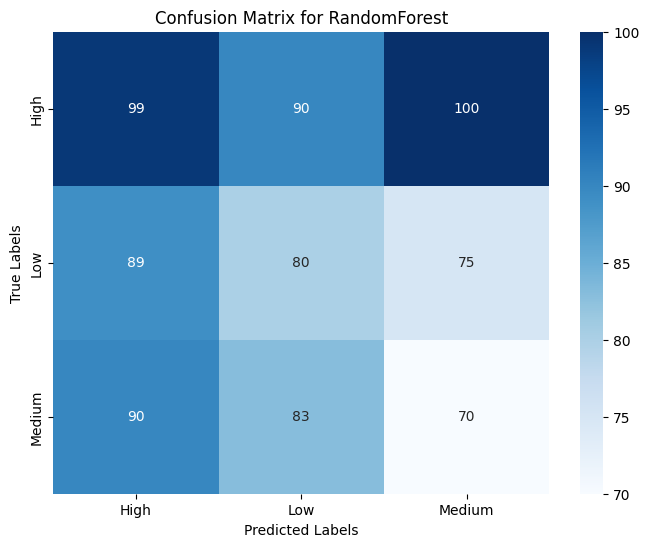

<Figure size 640x480 with 0 Axes>

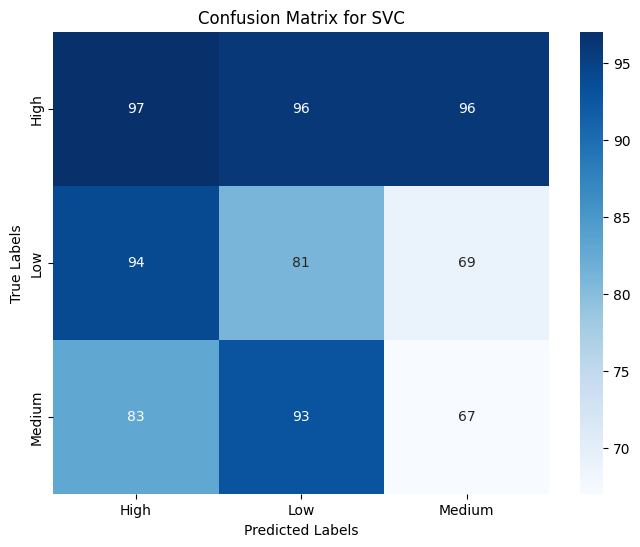

<Figure size 640x480 with 0 Axes>

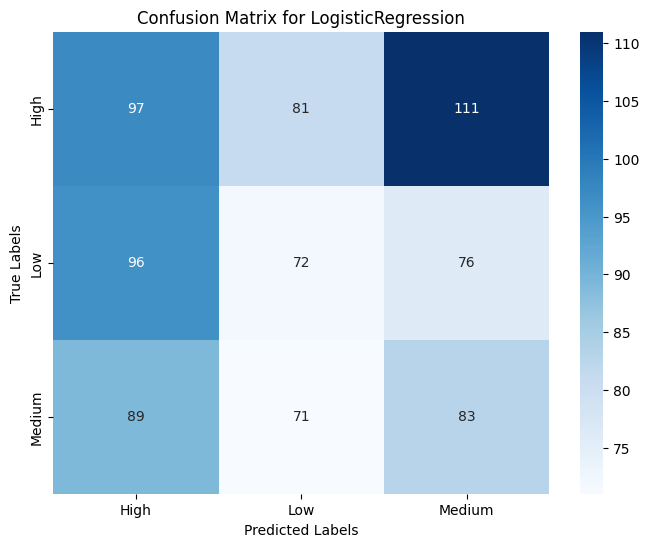

<Figure size 640x480 with 0 Axes>

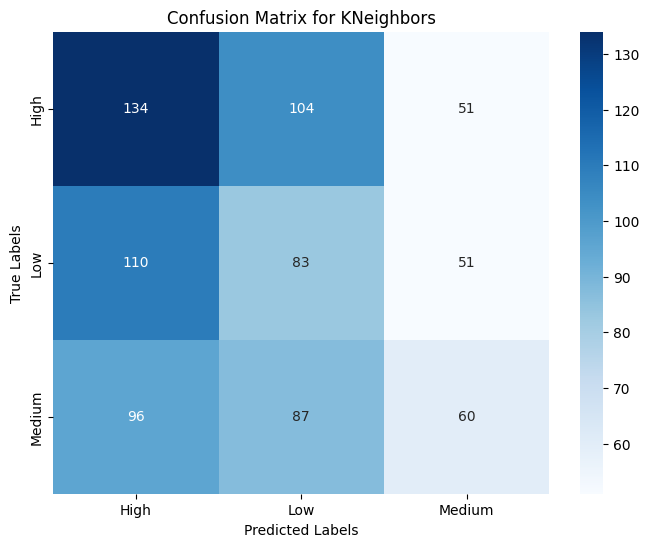

<Figure size 640x480 with 0 Axes>

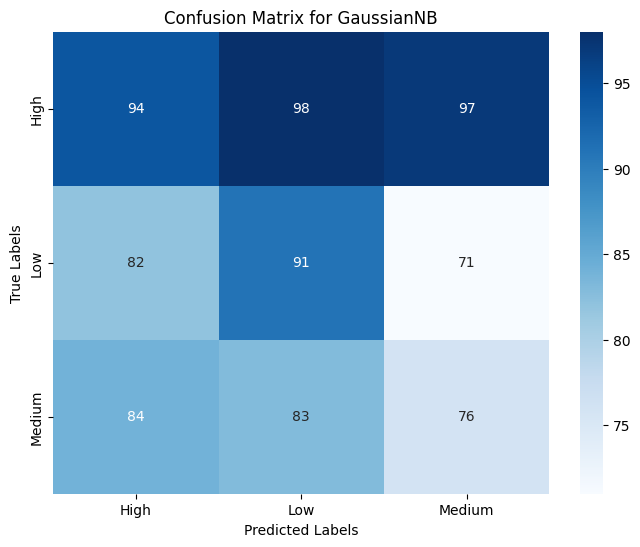

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 'data_prepared_df' is the DataFrame with prepared data and 'data_labels' is the target column
X = data_prepared_df  # Your features
y = data_labels  # Your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the classifiers
classifiers = {
    'RandomForest': RandomForestClassifier(),
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression(),
    'KNeighbors': KNeighborsClassifier(),
    'GaussianNB': GaussianNB(),
}

# Create confusion matrices for each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=np.unique(data_labels),
                yticklabels=np.unique(data_labels))
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
    plt.tight_layout()

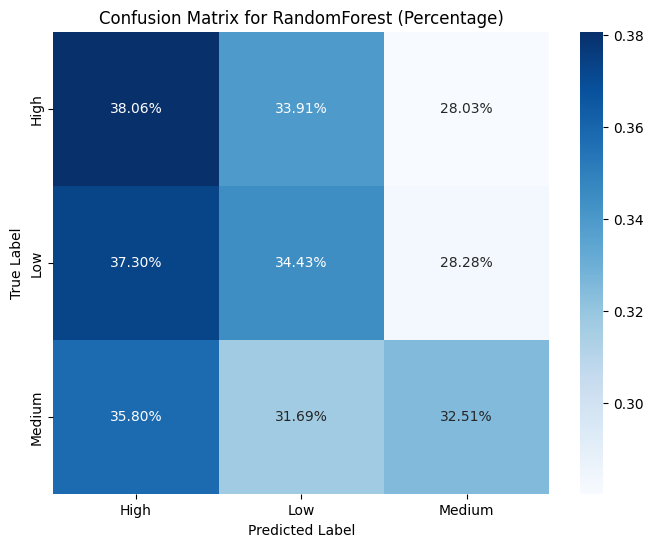

<Figure size 640x480 with 0 Axes>

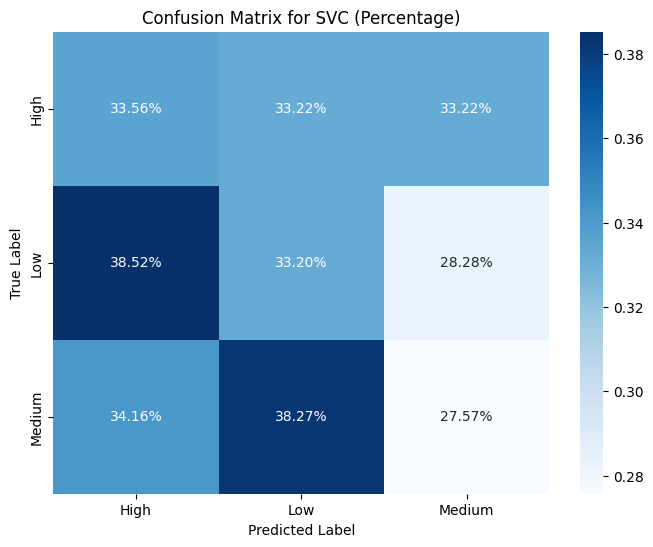

<Figure size 640x480 with 0 Axes>

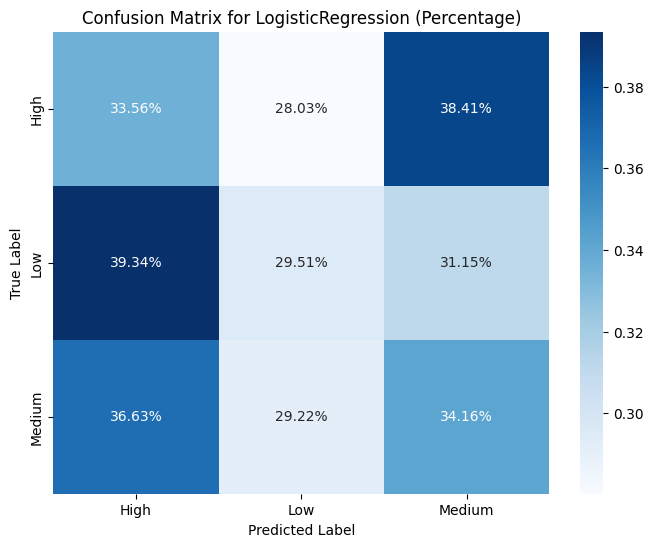

<Figure size 640x480 with 0 Axes>

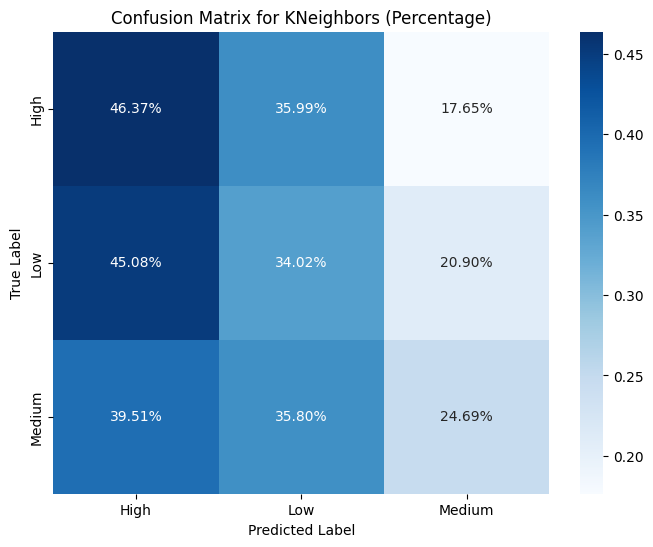

<Figure size 640x480 with 0 Axes>

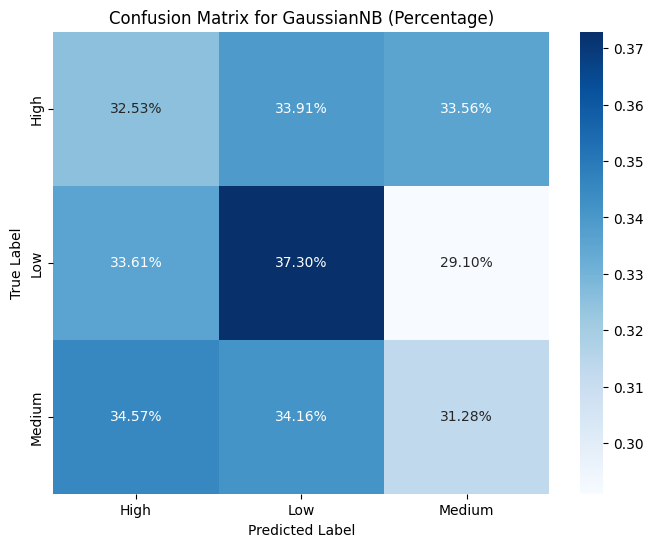

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# 'data_prepared_df' is your DataFrame with prepared data and 'data_labels' is the target column
X = data_prepared_df  # Your features
y = data_labels  # Your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the classifiers
classifiers = {
    'RandomForest': RandomForestClassifier(),
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression(),
    'KNeighbors': KNeighborsClassifier(),
    'GaussianNB': GaussianNB(),
}

# Create confusion matrices for each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Normalize the confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Plot the confusion matrix as a heatmap with percentage values
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap="Blues",
                xticklabels=np.unique(data_labels),
                yticklabels=np.unique(data_labels))
    plt.title(f"Confusion Matrix for {name} (Percentage)")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    plt.tight_layout()

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Define the classifiers and their respective parameter grids
classifiers = {
    'RandomForest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'SVC': {
        'model': SVC(),
        'param_grid': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(),
        'param_grid': {
            'C': [0.1, 1, 10],
            'penalty': ['l1', 'l2']
        }
    },
    'KNeighbors': {
        'model': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
    'GaussianNB': {
        'model': GaussianNB(),
        'param_grid': {}  # No hyperparameters to tune for GaussianNB
    }
}

# Perform GridSearchCV for each classifier
for name, clf_data in classifiers.items():
    print(f"Tuning {name}...")
    grid_search = GridSearchCV(clf_data['model'], clf_data['param_grid'], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)  # Assuming X_train and y_train are defined

    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best score for {name}: {grid_search.best_score_}")
    print("-" * 20)  # Separator between classifiers

Tuning RandomForest...
Best parameters for RandomForest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best score for RandomForest: 0.3498794867799075
--------------------
Tuning SVC...
Best parameters for SVC: {'C': 10, 'kernel': 'rbf'}
Best score for SVC: 0.33859955326996
--------------------
Tuning LogisticRegression...
Best parameters for LogisticRegression: {'C': 0.1, 'penalty': 'l2'}
Best score for LogisticRegression: 0.32475299984416395
--------------------
Tuning KNeighbors...
Best parameters for KNeighbors: {'n_neighbors': 7, 'weights': 'uniform'}
Best score for KNeighbors: 0.3379491974442886
--------------------
Tuning GaussianNB...
Best parameters for GaussianNB: {}
Best score for GaussianNB: 0.3234590410887746
--------------------


## Feature Engineering/ Selection

### 1) Understanding the Mutual Information. (Method 1)

In [ ]:
from sklearn.feature_selection import mutual_info_regression


def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(['object', 'category']):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    # Convert target variable to numerical using LabelEncoder if it contains strings
    if y.dtype == 'object':
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        y = le.fit_transform(y)
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=True)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title('Mutual Information Scores')


In [ ]:
X = data.copy()
# select the target to see the connection
y = data_labels.copy()

mi_scores = make_mi_scores(X, y)


Age                                  0.000000
Company_Support_for_Remote_Work      0.000000
Satisfaction_with_Remote_Work        0.000000
Physical_Activity                    0.000000
Number_of_Virtual_Meetings           0.000000
Work_Life_Balance_Rating             0.000000
Years_of_Experience                  0.000000
Gender                               0.000000
Sleep_Quality                        0.000000
Productivity_Change                  0.001373
Access_to_Mental_Health_Resources    0.001671
Hours_Worked_Per_Week                0.004393
Work_Location                        0.005429
Mental_Health_Condition              0.008253
Industry                             0.011126
Social_Isolation_Rating              0.013594
Job_Role                             0.014650
Name: MI Scores, dtype: float64


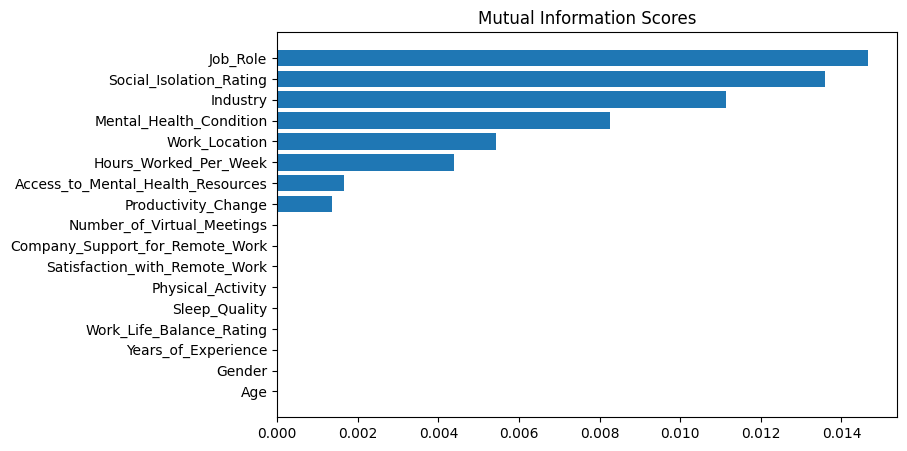

In [ ]:
print(mi_scores.head(20))

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(20))
# to see lowest 20
# plot_mi_scores(mi_scores.tail(20))

### 2) Applying PCA with Elbow Method. (Method 2)

#### PCA commonly used for visualizing high-dimensional dataset

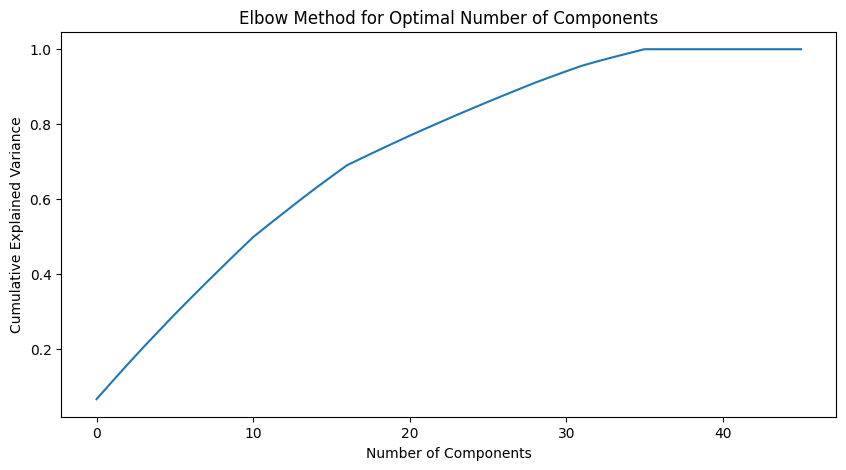

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'data_prepared_df' is your DataFrame with prepared data
X = data_prepared_df.values

# 1. Scale the data:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# 2. Apply PCA:
pca = PCA()
pca.fit(X)
#pca.fit(X_scaled)

# 3. Determine the optimal number of components using the elbow method:
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Method for Optimal Number of Components')
plt.show()

# Choose the number of components where the explained variance starts to level off (elbow point).
# Let's say you choose n_components = k based on the elbow method.

# 4. Refit PCA with the chosen number of components:
# best_pca = PCA(n_components=k)  # Replace k with the chosen number
# X_pca = best_pca.fit_transform(X_scaled)

# Now, X_pca contains the reduced-dimensional data.

* The curve quantifies how much the total 46-dimensional variance is contained in the first N components
* The first 20 components contain approximately 75% of the variance while you need around 35 components to describe close to 100%

In [ ]:
# Refit PCA with the chosen number of components:
best_pca = PCA(0.95)  # 95% representation of the data
X_pca = best_pca.fit_transform(X)

In [ ]:
# view the dimension of the data transform
print('original shape: ', X.shape)
print('transformed shape: ', X_pca.shape)

original shape:  (3880, 46)
transformed shape:  (3880, 32)


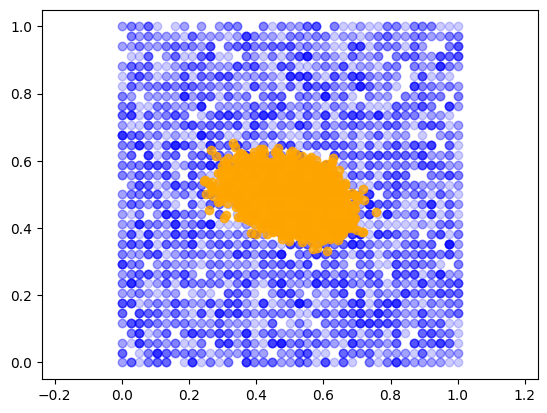

In [ ]:
# to understand the effect of the dimensionality reduction, we can perform the inverse transform
pca_new = best_pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2, c='blue')
plt.scatter(pca_new[:, 0], pca_new[:, 1], alpha=0.8, c='orange')
plt.axis('equal');

#### You can plot the first two principal components:

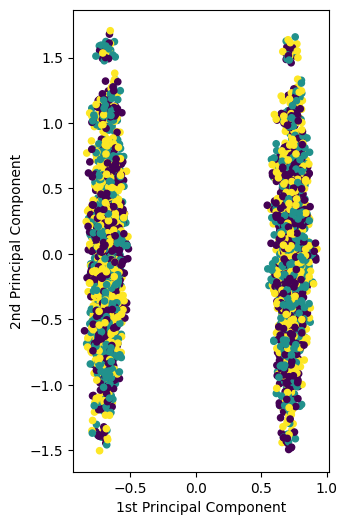

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 1. Convert categorical labels to numerical values using LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

plt.figure(figsize=(6,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap='viridis', s=20)
plt.gca().set_aspect('equal')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.show()

# Full pipeline

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
import joblib  # For saving the model


# Create the full pipeline
full_pipeline = Pipeline([
    ('preprocessing', PreprocessingTransformer(num_attribs, cat_attribs, custom_imputer_cols, column_to_drop)),
    ('classifier', RandomForestClassifier(random_state=0))  # Or any other chosen classifier
])

# Fit the pipeline to your training data
full_pipeline.fit(data, data_labels)  # Assuming 'data_labels' is the target variable



Pipeline(steps=[('preprocessing',
                 PreprocessingTransformer(cat_attribs=['Gender', 'Job_Role',
                                                       'Industry',
                                                       'Work_Location',
                                                       'Mental_Health_Condition',
                                                       'Access_to_Mental_Health_Resources',
                                                       'Productivity_Change',
                                                       'Satisfaction_with_Remote_Work',
                                                       'Physical_Activity',
                                                       'Sleep_Quality'],
                                          column_to_drop=['Employee_ID',
                                                          'Region'],
                                          custom_imputer_cols=['Mental_Health_Condition',
                                                               'Physical_Activity'],
                                          num_attribs=['Age',
                                                       'Years_of_Experience',
                                                       'Hours_Worked_Per_Week',
                                                       'Number_of_Virtual_Meetings',
                                                       'Work_Life_Balance_Rating',
                                                       'Social_Isolation_Rating',
                                                       'Company_Support_for_Remote_Work'])),
                ('classifier', RandomForestClassifier(random_state=0))])

In [ ]:
# Save the model using joblib
joblib.dump(full_pipeline, 'my_stress_level_classifier.pkl')

['my_stress_level_classifier.pkl']

# Now let's test the model

In [ ]:
import joblib

# load the saved model:
loaded_model = joblib.load('my_stress_level_classifier.pkl')
predictions = loaded_model.predict(test_set)

In [ ]:
print(predictions.shape)

(1000,)


In [ ]:
 y_test = test_set['Stress_Level'].copy()

In [ ]:
# Evaluate the accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.35


# **Conclusion**

* The performance of the model is not the best since my focus is to successfully build a ML model with complete pipeline and stored the model for future use.
* The next update on this project is to apply all the improvement that necessary to improve the model performance.
* There are many possibilities that possibly caused the model to perform worse.
* Feature selection/ engineering looks like the next improvement that I will make for future updates.